#                      #Drug Classification

Dataset problems:

This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.



Data Set Description 🧾
👉 There are 6 variables in this data set:

4 categorical variables,and
2 continuous variables.

# Import Libraries

In [3]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

# Load Data

In [4]:
data=pd.read_csv(r"C:\Users\umade\Downloads\drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# Data Preprocessing

  data types and dimensions,
  Checking for Missing Values,
  Statistical Summary,
  Data Correlation.

In [6]:
data.shape


(200, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [8]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

from the above results there are no missing values in the dataset

Note:The diagonal values are always 1 because it is the correlation of the variable with itself.
	
Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

In [9]:
corr=data.corr()
corr

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [10]:
data.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

from above results DrugY has more amount than other types

In [11]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [12]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [13]:
# splitting features and the target variable
# consider all the columns except 'Drug' using 'iloc'
data_features = data.iloc[:, data.columns != 'Drug']

# consider the target variable
data_target = data.iloc[:, data.columns == 'Drug']

# Summary Statistics

In [14]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [15]:
data.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


1. Distribution of numeric independent variables.
For the independent numeric variables, we plot the histogram to check the distribution of the variables.

# EDA

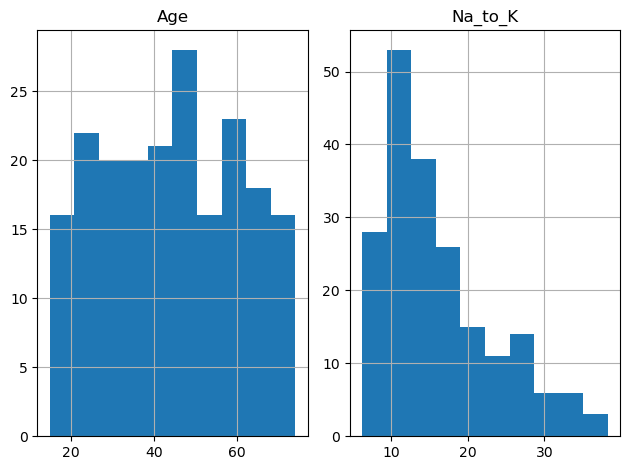

In [16]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
data_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

2. Distribution of categoric independent variables.
For the independent categoric variables, we plot the bar plot to check the distribution of each variables

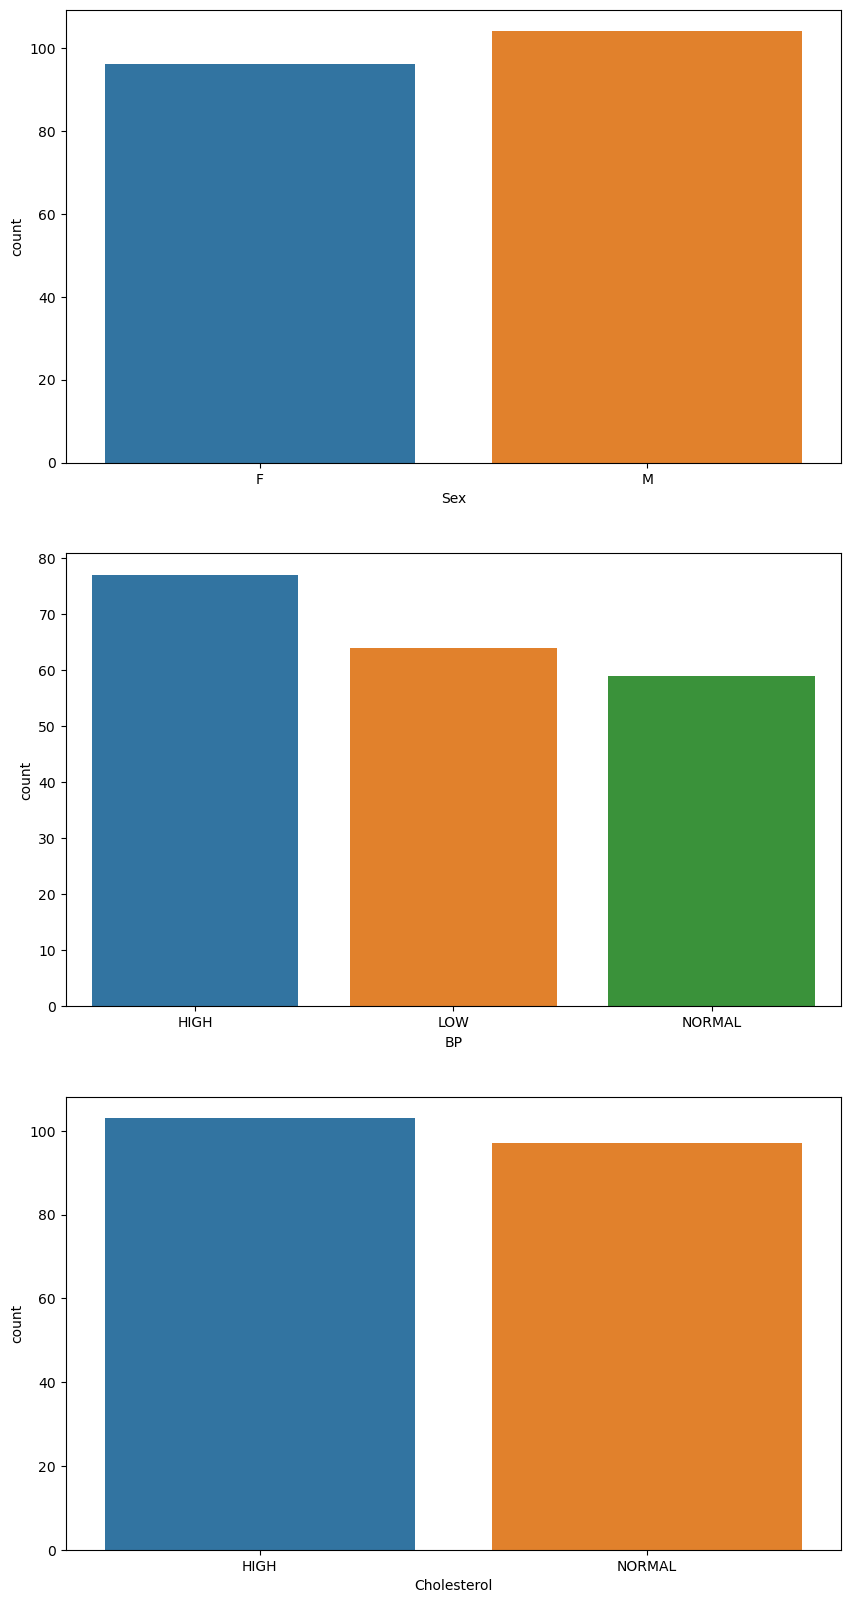

In [17]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in data_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(data_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(10, 20))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(data[variable], ax = subplot)

# display the plot
plt.show()

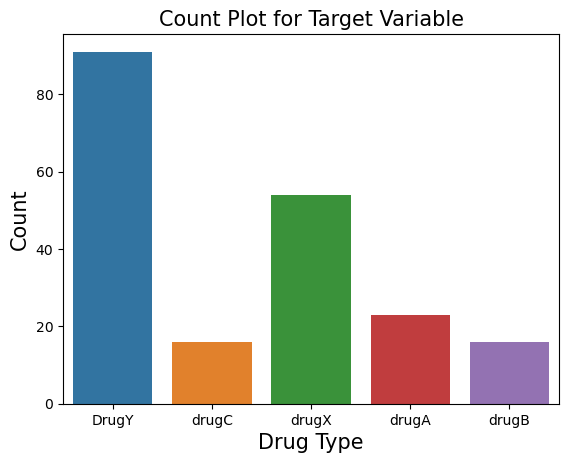

In [18]:
# plot the countplot of the variable 'target'
sns.countplot(data_target.Drug)
# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Drug Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

# Gender Distribution based on Drug Type 

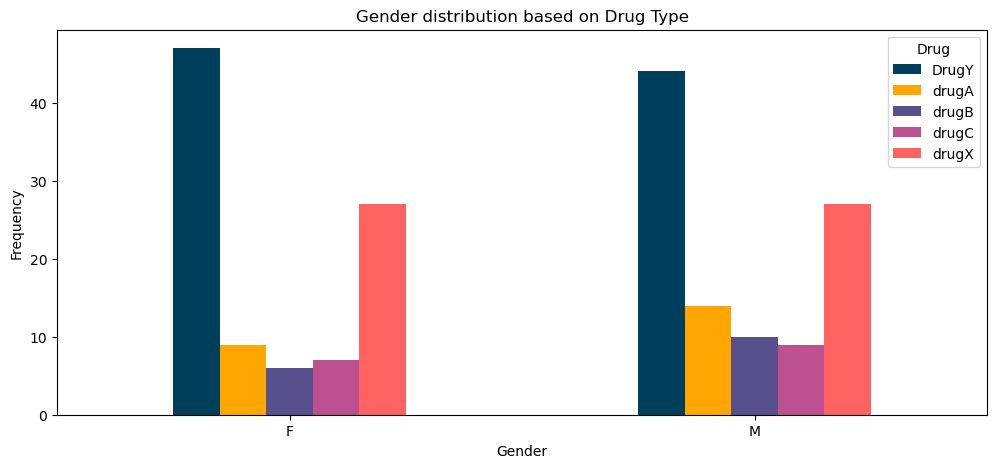

In [19]:
pd.crosstab(data.Sex,data.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug Type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

# Blood Pressure Distribution based on Cholesetrol 🩸🥛

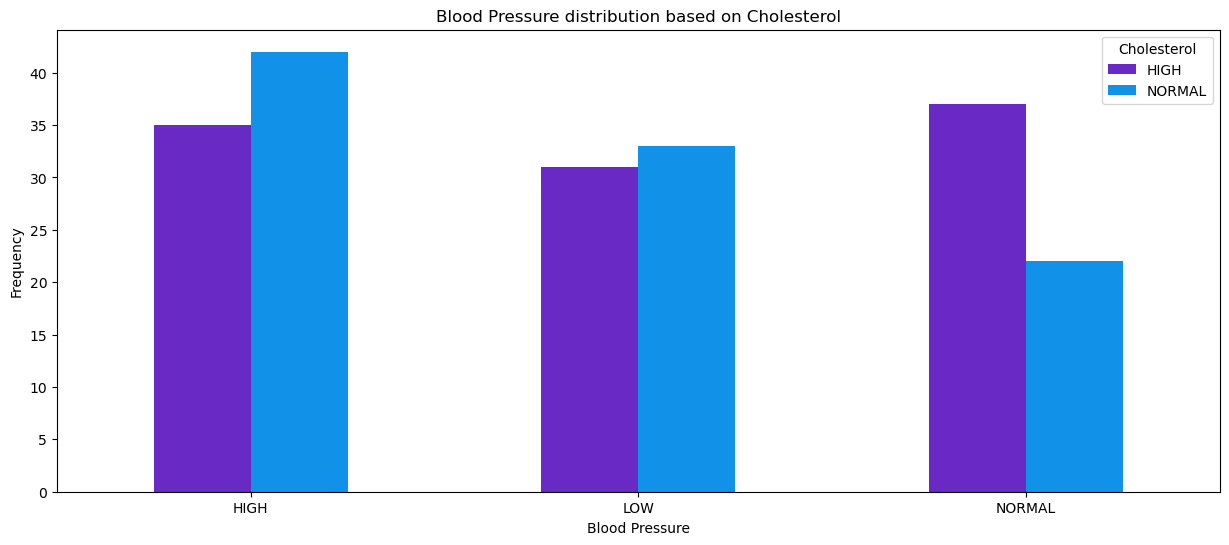

In [20]:
pd.crosstab(data.BP,data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Label Encoding for Target Variable
Converting target categorical variable into numeric

In [21]:
# replace 'drugA' with zero
data['Drug'] = data['Drug'].replace('drugA', 0)
# replace 'drugB' with one
data['Drug'] = data['Drug'].replace('drugB', 1)
# replace 'drugC' with two
data['Drug'] = data['Drug'].replace('drugC', 2)
# replace 'drugX' with one
data['Drug'] = data['Drug'].replace('drugX', 3)
# replace 'DrugY' with one
data['Drug'] = data['Drug'].replace('DrugY', 4)
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4


In [22]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in data:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(data[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

In [23]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
data_cat = data[categorical]

# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
data_num = data.drop(categorical, axis = 1)

# Dummy encode the categorical variables

In [24]:
# Label encoding is converting the labels into numeric form so as to convert them into machine readble form

# print the first five observations of the 'df_cat'
data_cat.head()

,Sex,BP,Cholesterol
0,F,HIGH,HIGH
1,M,LOW,HIGH
2,M,LOW,HIGH
3,F,NORMAL,HIGH
4,F,LOW,HIGH


In [26]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
data_cat_dummies = pd.get_dummies(data_cat)
data_cat_dummies.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0


In [27]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
data_dummy = pd.concat([data_num, data_cat_dummies], axis=1)

# display first five observations of the dummy dataframe
data_dummy.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,4,1,0,1,0,0,1,0
1,47,13.093,2,0,1,0,1,0,1,0
2,47,10.114,2,0,1,0,1,0,1,0
3,28,7.798,3,1,0,0,0,1,1,0
4,61,18.043,4,1,0,0,1,0,1,0


In [28]:
# select only the target variable 'Drug' and store it in dataframe 'y'
y = pd.DataFrame(data_dummy['Drug'])

Now, use this 'y' as a target variable to build the classification models.

In [29]:
# use 'drop()' to remove the variable 'Drug' from data_dummy
# 'axis = 1' drops the corresponding column(s)
X = data_dummy.drop('Drug',axis = 1)

In [30]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


Use this 'X' as a set of predictors to build the classification models.

# Standardise Data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [32]:
X = scaler.fit_transform(X)

In [33]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [34]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

# Logistic Regression


Logistic regression is one of the techniques used for classification. The estimates of the parameters are obtained by maximizing the likelihood function.



In [38]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (140, 9)
y_train (140, 1)
X_test (60, 9)
y_test (60, 1)


In [39]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)
y_pred = Logit_Model.predict(X_test)

In [40]:
y_pred

array([4, 3, 4, 3, 4, 4, 3, 2, 4, 2, 4, 2, 4, 0, 1, 3, 4, 0, 3, 4, 4, 4,
       0, 4, 2, 4, 1, 2, 2, 3, 3, 3, 0, 4, 3, 4, 3, 0, 0, 0, 4, 2, 4, 0,
       3, 3, 3, 3, 1, 3, 4, 3, 1, 4, 4, 4, 1, 1, 4, 4], dtype=int64)

In [41]:
from sklearn.metrics import classification_report, accuracy_score

Score = accuracy_score(y_test,y_pred)
Score

0.9166666666666666

In [42]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression model to the function
test_report = get_test_report(Logit_Model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.67      0.67      0.67         6
           2       1.00      1.00      1.00         7
           3       0.94      1.00      0.97        15
           4       1.00      0.92      0.96        25

    accuracy                           0.92        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.92      0.92      0.92        60



In [43]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
 
# print the kappa value
print(kappa_value)

0.886535552193646


# 2.Decision Tree

In [44]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)


In [45]:
#Build a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Creating a decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 10, max_depth = 3,
                                     min_samples_leaf = 5) 

In [46]:
# Training the model 
clf_fit = clf_entropy.fit(X_train, y_train) 

# Predicting 
y_pred = clf_fit.predict(X_test) 

In [47]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85

Perform Hyperparameter Tuning

In [48]:
# Again creating a decision tree classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 20, max_depth = 4,
                                  min_samples_leaf = 10)

In [49]:
# Training the model 
clf_fit_2 = clf_gini.fit(X_train, y_train) 

# Predicting the chance of admission
y_pred_2 = clf_fit_2.predict(X_test) 

In [50]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_2)

0.8833333333333333

In [51]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.67      0.80         6
           2       0.60      0.86      0.71         7
           3       0.92      0.73      0.81        15
           4       1.00      1.00      1.00        25

    accuracy                           0.88        60
   macro avg       0.86      0.85      0.84        60
weighted avg       0.91      0.88      0.88        60



We can see here that by changing the values of the parameter, there is a slight increase in the accuracy. Earlier we were using 'Entropy' as criterion, now we are using 'Gini' as criterion, the max depth of the tree has been increased and so on. Similarly, we can keep on tuning the parameters, to obtain the highest accuracy.



# 3.Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
#intantiate the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=10)

# fit the  classifier with training dataset
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [64]:
# predict the values on test dataset using predict()
y_pred = rf_clf.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        25

    accuracy                           0.98        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.99      0.98      0.98        60



Accuracy Score for Random Forest is 98%

# 4.KNN Model

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for K nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like Euclidean, Manhattan, Chebyshev, Hamming, and so on.

In [70]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)


Build a knn model on a training dataset using euclidean distance.

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Build a knn model on a training dataset using euclidean distance.
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [72]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        25

    accuracy                           0.98        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.99      0.98      0.98        60



 The accuracy is 98% for this model.

# 5. SVM Model

 Support Vector Machine using Linear Kernal¶

In [76]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)


In [77]:
from sklearn.svm import SVC

# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svclassifier.fit(X_train, y_train)


SVC(kernel='linear')

In [78]:
# predict the values
y_pred = svclassifier.predict(X_test)

In [79]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.83      0.83         6
           2       1.00      0.86      0.92         7
           3       0.94      1.00      0.97        15
           4       0.96      0.96      0.96        25

    accuracy                           0.93        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



Support Vector Machine using Gaussian Kernal

In [80]:
# build the model
svclassifier = SVC(kernel = 'rbf')

# fit the model
svclassifier.fit(X_train, y_train)

SVC()

In [81]:
# predict the values
y_pred_gaussian  = svclassifier.predict(X_test)

In [82]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_gaussian)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       1.00      0.50      0.67         6
           2       1.00      0.71      0.83         7
           3       0.83      1.00      0.91        15
           4       0.80      0.80      0.80        25

    accuracy                           0.78        60
   macro avg       0.82      0.72      0.74        60
weighted avg       0.81      0.78      0.78        60



Support Vector Machine using Sigmoid Kernal

In [83]:
# build the model
svclassifier = SVC(kernel='sigmoid')
# fit the model
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [84]:
# predict the values
y_pred_sigmoid  = svclassifier.predict(X_test)

In [85]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_sigmoid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.60      0.50      0.55         6
           2       1.00      1.00      1.00         7
           3       0.94      1.00      0.97        15
           4       0.88      0.88      0.88        25

    accuracy                           0.85        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.84      0.85      0.85        60



Support Vector Machine using Polynomial Kernal

In [86]:
# build the model
svclassifier = SVC(kernel='poly')
# fit the model
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [87]:
# predict the values
y_pred_Poly  = svclassifier.predict(X_test)

In [88]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       1.00      0.33      0.50         6
           2       1.00      0.43      0.60         7
           3       0.88      1.00      0.94        15
           4       0.66      0.84      0.74        25

    accuracy                           0.72        60
   macro avg       0.77      0.58      0.62        60
weighted avg       0.75      0.72      0.70        60



#  SVM results